In [22]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [23]:
# Read the data
df = pd.read_csv('Churn_Modelling.csv')

In [24]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
# print top 5 rows of dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# in our dataset, we should remove unnecessary features like rownumber, customerid , surname

In [26]:
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Geography and Gender columns are in string , convert them into numerical value 

# in pandas we have method called dummies.

In [28]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [29]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [30]:
# ont hpt encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [32]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [33]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [34]:
# check for null and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 820.4 KB


In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
# split into dependent and independent variable
X = df.drop(columns = 'Exited' , axis = 1)
y =df['Exited']

In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 20)

In [45]:
X_train.shape

(8000, 10)

In [46]:
X_test.shape

(2000, 10)

In [47]:
# Standarddised the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
X_train_scaled   = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

In [55]:
X_train_scaled

array([[ 1.34111823, -0.91036007, -1.08948952, ..., -1.55666057,
         0.96801137, -1.45550088],
       [-1.4670728 , -0.91036007,  0.91786105, ...,  0.6424008 ,
         0.96801137, -0.24201773],
       [-0.19155746, -0.91036007, -1.08948952, ..., -1.55666057,
        -1.03304572, -1.1930393 ],
       ...,
       [ 0.5079187 ,  0.29461686, -1.08948952, ...,  0.6424008 ,
         0.96801137,  0.98520155],
       [-2.25912668, -0.91036007,  0.91786105, ...,  0.6424008 ,
        -1.03304572, -0.06368086],
       [-0.78816947,  1.49959379,  0.91786105, ..., -1.55666057,
         0.96801137,  0.98536606]])

In [59]:
X_test_scaled

array([[-0.17098463, -0.91036007,  0.91786105, ...,  0.6424008 ,
        -1.03304572,  0.0223844 ],
       [ 2.06116722,  1.49959379,  0.91786105, ...,  0.6424008 ,
         0.96801137, -1.22639741],
       [ 0.52849152, -0.91036007,  0.91786105, ...,  0.6424008 ,
        -1.03304572, -1.32109719],
       ...,
       [-0.91160644,  1.49959379,  0.91786105, ...,  0.6424008 ,
         0.96801137, -0.50074602],
       [-1.29220376,  0.29461686,  0.91786105, ...,  0.6424008 ,
        -1.03304572, -1.17072958],
       [ 1.00166657, -0.91036007,  0.91786105, ...,  0.6424008 ,
         0.96801137, -1.33285865]])

In [115]:
# import neural network library 

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# model building using sequential 

In [116]:
model  = Sequential()

In [117]:
model.add(Dense(10, activation = 'relu' , input_dim = 10))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))          

C:\Users\Parveen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231 (924.00 B)

 Trainable params: 231 (924.00 B)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [121]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 8.2229 - val_accuracy: 0.7906 - val_loss: 4.1880
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6910 - loss: 8.2402 - val_accuracy: 0.3675 - val_loss: 6.2652
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6675 - loss: 10.6017 - val_accuracy: 0.7937 - val_loss: 4.2486
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7079 - loss: 7.1404 - val_accuracy: 0.7931 - val_loss: 5.6415
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6786 - loss: 8.3281 - val_accuracy: 0.4944 - val_loss: 4.3668
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - loss: 6.8835 - val_accuracy: 0.8000 - val_loss: 31.7846
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7142 - loss: 8.8038 - val_accuracy: 0.7825 - val_loss: 3.9767
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 7.9843 - val_ac

Epoch 51/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7091 - loss: 6.2432 - val_accuracy: 0.7581 - val_loss: 1.3976
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6817 - loss: 10.5108 - val_accuracy: 0.4231 - val_loss: 6.1685
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7011 - loss: 7.0752 - val_accuracy: 0.8000 - val_loss: 16.4416
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 9.4989 - val_accuracy: 0.7881 - val_loss: 2.4278
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7199 - loss: 4.9727 - val_accuracy: 0.6062 - val_loss: 7.7112
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - loss: 6.1256 - val_accuracy: 0.5000 - val_loss: 5.3224
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6954 - loss: 6.3647 - val_accuracy: 0.7969 - val_loss: 7.9585
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 6.7201 

In [134]:
# prediction

y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.12594068],
       [0.05537686],
       [0.00368281],
       ...,
       [0.03988588],
       [0.00141897],
       [0.02909333]], dtype=float32)

In [135]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [137]:
# accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test , y_pred)
score

0.721

In [138]:
history.history

{'accuracy': [0.6949999928474426,
  0.694531261920929,
  0.6909375190734863,
  0.6890624761581421,
  0.6895312666893005,
  0.6965625286102295,
  0.7028124928474426,
  0.6876562237739563,
  0.682812511920929,
  0.692187488079071,
  0.694531261920929,
  0.7176562547683716,
  0.6956250071525574,
  0.6976562738418579,
  0.6929687261581421,
  0.6912500262260437,
  0.7065625190734863,
  0.6985937356948853,
  0.6859375238418579,
  0.7043750286102295,
  0.7032812237739563,
  0.6940624713897705,
  0.7096874713897705,
  0.6942187547683716,
  0.6959375143051147,
  0.6946874856948853,
  0.6920312643051147,
  0.6899999976158142,
  0.6834375262260437,
  0.6915624737739563,
  0.69140625,
  0.6934375166893005,
  0.7012500166893005,
  0.6942187547683716,
  0.7026562690734863,
  0.6912500262260437,
  0.6884375214576721,
  0.6870312690734863,
  0.7003124952316284,
  0.7035937309265137,
  0.7009375095367432,
  0.6979687213897705,
  0.707812488079071,
  0.6998437643051147,
  0.6967187523841858,
  0.7039062

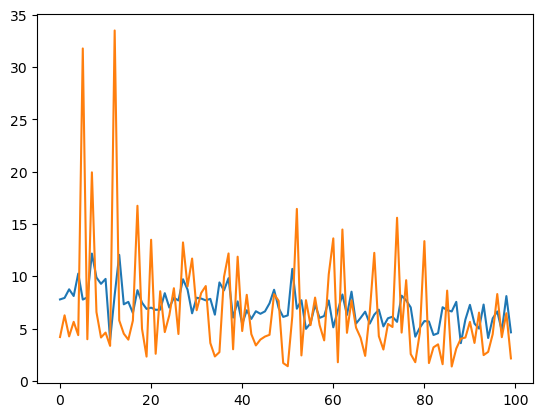

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

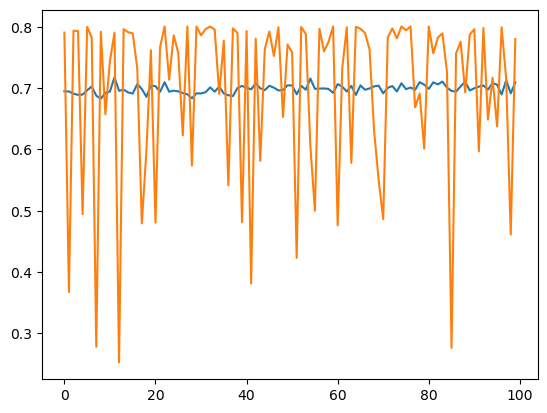

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])